In [94]:
import numpy as np
import  matplotlib.pyplot as plt
import scipy.special as sp

In [95]:
def source(no_of_users,no_of_bits):
    return np.random.randint(0, 2, (no_of_users,no_of_bits))
no_of_users=1
no_of_bits=10000
msg_bits1=source(no_of_users,no_of_bits)

print("msg\n",msg_bits1)

msg
 [[0 0 1 ... 1 1 0]]


In [96]:
def mod(bits):
    #mapping
    return 2*bits-1

symbols=mod(msg_bits1)
print(symbols)

[[-1 -1  1 ...  1  1 -1]]


In [97]:
def awgn(symbols, snr_db):

    combined_symbols=np.sum(symbols,axis=0)
    signal_power = np.mean(combined_symbols**2)

    snr_linear = 10**(snr_db / 10.0)
    noise_variance =  signal_power / (2 * snr_linear)

    noise = np.sqrt(noise_variance) * (np.random.randn(len(combined_symbols)))

    
    return combined_symbols + noise

snr_db=np.arange(0,1,1)
received_signal=awgn(symbols,snr_db)
print(received_signal)

[-1.71575822 -0.35567924  0.24424364 ...  2.49655296  0.97840371
 -2.12950779]


In [98]:
def demod(received_signal):
    symbols = {
        1:1,
        -1:0
    }

    #demodulation
    demodulated_bits=np.array([])
    for i in received_signal:
        closest_symbol = min(symbols.keys(), key=lambda s: np.abs(i - s))
        demodulated_bits=np.append(demodulated_bits,(symbols[closest_symbol]))


    received_signal1=np.array([int(i)  for i in demodulated_bits])

    return received_signal1
demod_symbols=demod(received_signal)
print(demod_symbols)

[0 0 1 ... 1 1 0]


In [99]:
def calculate_ber(msg,rec,no_of_users,no_of_bits):
    # print(msg)
    msg_sum=np.sum(msg,axis=0)
    # print("\n",msg_sum)
    # print("\n",rec)

    ber=np.mean(msg_sum!=rec)
    return ber 
BER=calculate_ber(msg_bits1,demod_symbols,no_of_users,no_of_bits)
print(BER)

0.0806


In [110]:
def simulate(snr_db_range, msg_bits,no_of_users,no_of_bits):
    ber = []
    # print("msg\n",msg_bits)

    for snr_db in snr_db_range:
        # print("snr=",snr_db)
        # Modulation        symbols-->bitsy])
        transmitted_symbols =mod(msg_bits)
        # print("TX\n",transmitted_symbols)
        
        
        #channel output = bits+noie
        received_symbols = awgn(transmitted_symbols,snr_db)
        # print("sum(x)+n\n",received_symbols)
        
        # Demodulate the received signal        noisy_bits-->symbols
        demodulated_symbols =demod(received_symbols)
        # print("demod\n",demodulated_symbols)
    
        # Calculate BER
        ber.append(calculate_ber(msg_bits, demodulated_symbols,no_of_users,no_of_bits))
        # print(ber)
        # print("\n\n")

    return ber

snr_db_range=np.arange(0,9,1)
ser_bpsk_sum=simulate(snr_db_range,msg_bits1,no_of_users,no_of_bits)
print(ser_bpsk_sum)

[0.0779, 0.06, 0.0368, 0.0216, 0.0146, 0.0067, 0.0025, 0.0006, 0.0002]


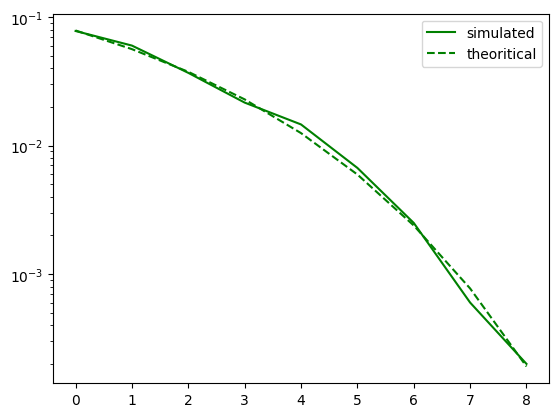

In [111]:
snr_lin=10**(snr_db_range/10)
ser_bpsk_sum_theory=0.5*sp.erfc(np.sqrt(snr_lin))
plt.semilogy(snr_db_range,ser_bpsk_sum,  linestyle='-', color="g", label='simulated')
plt.semilogy(snr_db_range, ser_bpsk_sum_theory,  linestyle='--', color='g', label='theoritical')
plt.legend()
plt.show()